In [24]:
import numpy as np
import os
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import random
from PointNet import PointNet

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score, classification_report

DATA_PATH = os.path.join('Keypoint Dataset', "V1")
actions = np.array([folder for folder in os.listdir(DATA_PATH)])

In [25]:
label_map = {label:num for num, label in enumerate(actions)}

dataset, labels = [], []
for action in actions:
    for data in range(len(os.listdir(os.path.join(DATA_PATH, action)))):
        res = np.load(os.path.join(DATA_PATH, action, "{}.npy".format(data)), allow_pickle=True)
        dataset.append(res)
        labels.append(label_map[action])

In [26]:
X = np.array(dataset)

y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [27]:
def build_model():
    cnnModel = Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        MaxPool1D(),
        Conv1D(64, 3, activation='relu'),
        MaxPool1D(),
        Conv1D(128, 3, activation='relu'),
        MaxPool1D(),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(actions.shape[0], activation='softmax')
    ])

    cnnModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return cnnModel

In [28]:
cnnModel = build_model()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

startTime = time.time()
history = cnnModel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])
endTime = time.time()
print("Training Duration: ", endTime - startTime)

cnnModel.save('CNN V1.h5')
predictions = cnnModel.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
acc = accuracy_score(y_test2, predictions)

C:\Users\leozh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.0675 - loss: 3.0390 - val_accuracy: 0.1383 - val_loss: 2.9260
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1363 - loss: 2.7739 - val_accuracy: 0.1614 - val_loss: 2.8838
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1752 - loss: 2.6173 - val_accuracy: 0.2219 - val_loss: 2.7821
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1860 - loss: 2.4903 - val_accuracy: 0.2680 - val_loss: 2.6584
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2278 - loss: 2.3765 - val_accuracy: 0.2939 - val_loss: 2.4564
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2463 - loss: 2.3149 - val_accuracy: 0.3343 - val_loss: 2.2040
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2879 - loss: 2.1691 - val_accuracy: 0.4524 - val_loss: 1.9904
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2915 - loss: 2.1058 - val_accuracy: 0

Training Duration:  141.29810500144958
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.8294797687861272
Precision Score: 0.843532354869828
Recall Score: 0.8294797687861272
F1 Score: 0.8299361151929912
Classification Report: 
              precision    recall  f1-score   support

        Anda       0.59      0.83      0.69        24
         Apa       1.00      0.91      0.95        22
    Berhenti       0.91      0.91      0.91        11
       Bodoh       1.00      0.81      0.90        16
      Cantik       0.73      0.79      0.76        14
        Halo       1.00      1.00      1.00         8
   Hati-hati       0.93      0.76      0.84        17
       Lelah       0.93      0.93      0.93        15
        Maaf       0.96      1.00      0.98        24
       Makan       0.75      0.90      0.82        10
   Mau-Ingin       0.71      0.75      0.73        20
     Membaca       0.90      0.50      0.64        18
        Nama       0.33      0.35      0.34        17
   Sama-sama       0.86      0.67      0.75        18

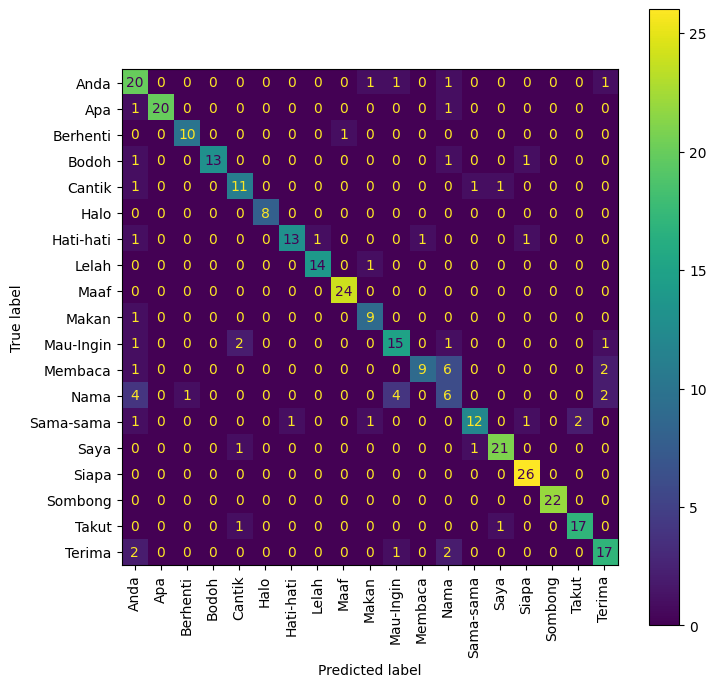

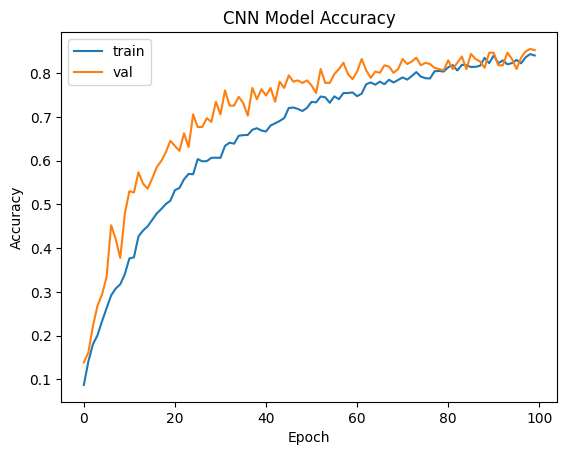

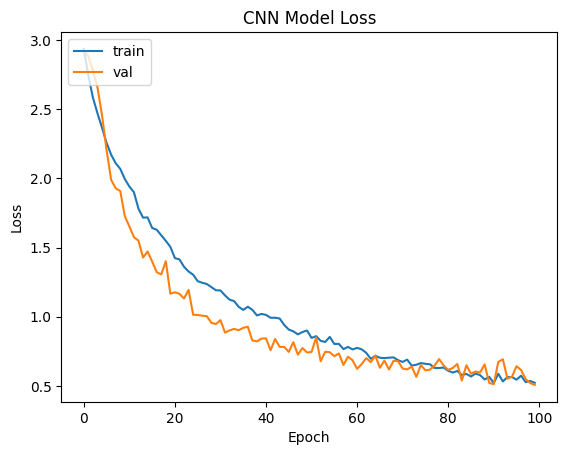

In [30]:
predictions = cnnModel.predict(X_test)

predictions = [np.argmax(pred) for pred in predictions]
y_test2 = [np.argmax(y_val) for y_val in y_test]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test2, predictions), display_labels = actions)

print(f"Accuracy: {accuracy_score(y_test2, predictions)}")
print(f"Precision Score: {precision_score(y_test2, predictions, average='weighted')}")
print(f"Recall Score: {recall_score(y_test2, predictions, average='weighted')}")
print(f"F1 Score: {f1_score(y_test2, predictions, average='weighted')}")

print(f"Classification Report: \n{classification_report(y_test2, predictions, target_names=actions)}")

fig, ax = plt.subplots(figsize=(8,8))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model_name = "pointnetv1"
device = "cpu"
train = []

id2label = {}

for index, folder in enumerate(os.listdir(DATA_PATH)):
    folder_path = os.path.join(DATA_PATH, folder)
    id2label[index] = folder
    for data_name in os.listdir(folder_path):
        data = np.load(os.path.join(folder_path, data_name), allow_pickle=True)
        # data = data[:-1]
        train.append({'label':index, 'data':data.tolist()})

random.shuffle(train)
TEST_SIZE = (int)(len(train) * 0.1)
VAL_SIZE = (int)(len(train) * 0.1)
test = train[-TEST_SIZE:]
val = train[-(TEST_SIZE + VAL_SIZE):-TEST_SIZE]
train = train[:-(TEST_SIZE + VAL_SIZE)]

train_tensors = []
for i in train:
    train_tensors.append({
        "data": torch.tensor(i["data"]).float(),
        "label": torch.tensor(i["label"]).long()
    })

test_tensors = []
for i in test:
    test_tensors.append({
        "data": torch.tensor(i["data"]).float(),
        "label": torch.tensor(i["label"]).long()
    })

val_tensors = []
for i in val:
    val_tensors.append({
        "data": torch.tensor(i["data"]).float(),
        "label": torch.tensor(i["label"]).long()
    })

train_loader = DataLoader(train_tensors, batch_size=32, shuffle=True)
test_loader = DataLoader(test_tensors, batch_size=32, shuffle=True)
val_loader = DataLoader(val_tensors, batch_size=32, shuffle=True)

In [19]:
num_classes = len(id2label)
pointnet = PointNet(classes=num_classes, device=device)

In [22]:
checkpoint_path = f"Checkpoint/{model_name}.pth"

def pointnetloss(outputs, labels, m3x3, m64x64, alpha = 0.0001):
    criterion = torch.nn.NLLLoss()
    bs=outputs.size(0)
    id3x3 = torch.eye(3, requires_grad=True).repeat(bs,1,1).to(device)
    id64x64 = torch.eye(64, requires_grad=True).repeat(bs,1,1).to(device)
    diff3x3 = id3x3 - torch.bmm(m3x3,m3x3.transpose(1,2))
    diff64x64 = id64x64 - torch.bmm(m64x64,m64x64.transpose(1,2))
    return criterion(outputs, labels) + alpha * (torch.norm(diff3x3)+torch.norm(diff64x64)) / float(bs)

def train(model, train_loader, val_loader, epochs):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    for epoch in range(epochs): 
        model.train()
        running_loss = 0.0
        print_every_x = 16
        total_train = 0
        correct_train = 0
        for i, data in enumerate(train_loader, 0):
            inputs = data['data'].to(device)
            labels = data['label'].to(device)
            optimizer.zero_grad()
            outputs, m3x3, m64x64 = model(inputs.transpose(1,2))
            _, predicted = torch.max(outputs.data, 1)

            loss = pointnetloss(outputs, labels, m3x3, m64x64)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % print_every_x == print_every_x - 1:
                print(f"[Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {running_loss / print_every_x:.4f}]")
                running_loss = 0.0
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        avg_train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct_train / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)

        model.eval()
        total = correct = 0
        val_loss = 0
        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data['data'].to(device).float(), data['label'].to(device)
                outputs, m3x3, m64x64 = model(inputs.transpose(1,2))
                loss = pointnetloss(outputs, labels, m3x3, m64x64)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = 100 * correct / total
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)
        print(f'Epoch {epoch + 1}/{epochs} | Train Loss: {avg_train_loss:.4f} | Train Accuracy: {train_accuracy:.2f}% | Val Loss: {avg_val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%')
    return train_losses, val_losses, train_accuracies, val_accuracies
optimizer = torch.optim.Adam(pointnet.parameters(), lr=0.00025)
train_loss, val_loss, train_acc, val_acc = train(pointnet, train_loader, val_loader, epochs=80)
torch.save(pointnet.state_dict(), checkpoint_path)

[Epoch: 1, Batch: 16, Loss: 2.2635]
[Epoch: 1, Batch: 32, Loss: 2.1786]
[Epoch: 1, Batch: 48, Loss: 2.0973]
[Epoch: 1, Batch: 64, Loss: 2.0328]
[Epoch: 1, Batch: 80, Loss: 2.0020]
Epoch 1/80 | Train Loss: 0.1548 | Train Accuracy: 32.97% | Val Loss: 1.6901 | Val Accuracy: 47.40%
[Epoch: 2, Batch: 16, Loss: 1.8425]
[Epoch: 2, Batch: 32, Loss: 1.8636]
[Epoch: 2, Batch: 48, Loss: 1.8659]
[Epoch: 2, Batch: 64, Loss: 1.8794]
[Epoch: 2, Batch: 80, Loss: 1.7723]
Epoch 2/80 | Train Loss: 0.1388 | Train Accuracy: 41.38% | Val Loss: 1.6330 | Val Accuracy: 47.98%
[Epoch: 3, Batch: 16, Loss: 1.6874]
[Epoch: 3, Batch: 32, Loss: 1.6553]
[Epoch: 3, Batch: 48, Loss: 1.7045]
[Epoch: 3, Batch: 64, Loss: 1.6477]
[Epoch: 3, Batch: 80, Loss: 1.6556]
Epoch 3/80 | Train Loss: 0.1409 | Train Accuracy: 45.13% | Val Loss: 1.5824 | Val Accuracy: 50.00%
[Epoch: 4, Batch: 16, Loss: 1.5948]
[Epoch: 4, Batch: 32, Loss: 1.5491]
[Epoch: 4, Batch: 48, Loss: 1.5479]
[Epoch: 4, Batch: 64, Loss: 1.5128]
[Epoch: 4, Batch: 8

c:\Users\leozh\Leo\Coding\SignLanguageAI\Computer Vision Sign Language\PointNet.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(torch.load(path, m

Accuracy: 0.7976878612716763
Precision Score: 0.815344344746289
Recall Score: 0.7976878612716763
F1 Score: 0.7958888760573148
Classification Report:               precision    recall  f1-score   support

        Anda       0.80      0.57      0.67        21
         Apa       0.80      0.80      0.80        25
    Berhenti       1.00      0.83      0.91        18
       Bodoh       0.76      0.88      0.81        25
      Cantik       1.00      0.86      0.92        21
        Halo       0.88      1.00      0.93        14
   Hati-hati       0.71      0.59      0.65        17
       Lelah       1.00      1.00      1.00        16
        Maaf       0.75      1.00      0.86        12
       Makan       0.73      0.76      0.74        21
   Mau-Ingin       1.00      0.50      0.67        20
     Membaca       0.44      0.40      0.42        10
        Nama       0.22      0.29      0.25         7
   Sama-sama       0.71      0.86      0.77        14
        Saya       0.80      0.89      0

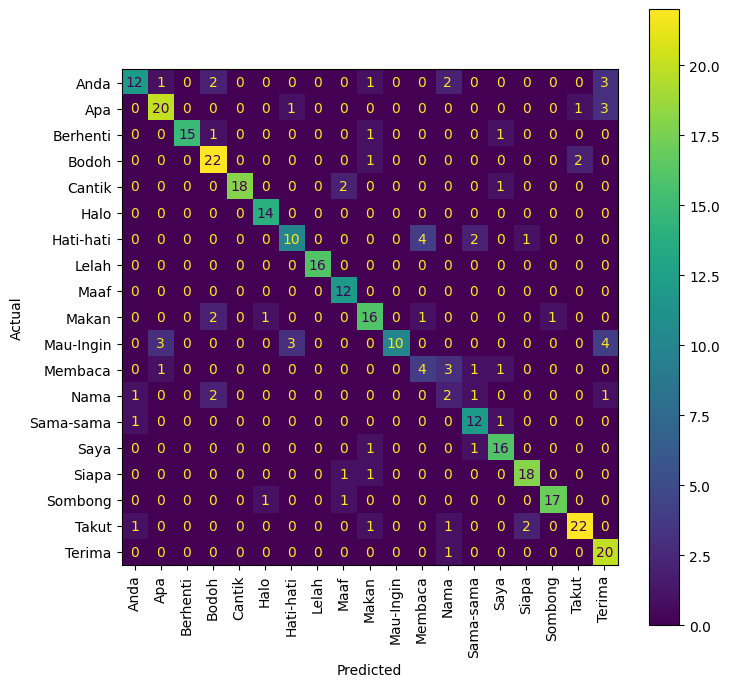

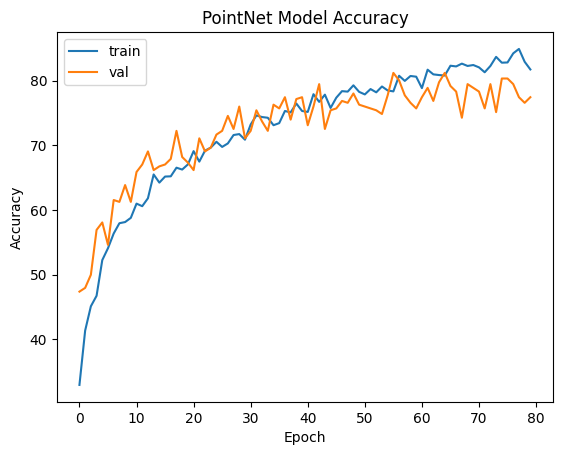

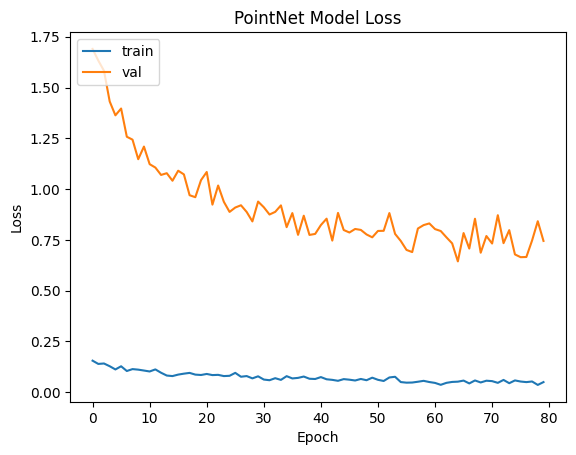

In [23]:
pointnet = PointNet(classes=num_classes, device="cpu")
pointnet.load_from_pth(checkpoint_path)
pointnet.eval()

all_preds = []
all_labels = []
with torch.no_grad():
    for i, data in enumerate(test_loader):
        inputs, labels = data['data'].float(), data['label'].long()
        outputs, _, _ = pointnet(inputs.transpose(1,2))
        _, preds = torch.max(outputs.data, 1)
        all_preds += preds.numpy().tolist()
        all_labels += labels.numpy().tolist()

print(f"Accuracy: {accuracy_score(all_labels, all_preds)}")
print(f"Precision Score: {precision_score(all_labels, all_preds, average='weighted')}")
print(f"Recall Score: {recall_score(all_labels, all_preds, average='weighted')}")
print(f"F1 Score: {f1_score(all_labels, all_preds, average='weighted')}")

print(f"Classification Report: {classification_report(all_labels, all_preds, target_names=id2label.values())}")

display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(all_labels, all_preds), display_labels = id2label.values())
fig, ax = plt.subplots(figsize=(8,8))
print(f"Confusion Matrix:\n")
display.plot(ax=ax, xticks_rotation='vertical')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('PointNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('PointNet Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()